In [1]:
# How good are Small LLMs at chess gameplay?
# Can they explain their reasoning?
# Does finetuning make them better?
# Do reasoning (e.g. chain-of-thought) techniques improve their performance?
# Can they be finetuned via RL selfplay?

#### Part 1: Eval off-the-shelf LLMs on chess gameplay

Use huggingface LLM api and python-chess and stockfish api to evaluate LLMs on chess gameplay.

In [2]:
# install python-chess and stockfish if not already installed

In [3]:
try:
  from stockfish import Stockfish
except ImportError:
  !pip install stockfish
  from stockfish import Stockfish

try:
  import chess
except ImportError:
  !pip install python-chess
  import chess

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.1/6.1 MB 76.1 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for chess: filename=chess-1.11.2-py3-none-any.whl size=147775 sha256=3a4bc534282f8c4e98332a6a412377ebeb81f6eb31e6af0e4e0c14bc914b05ba
  Stored in directory: /root/.cache/pip/wheels/83/1f/4e/8f4300f7dd554eb8de70ddfed96e94d3d030ace10c5b53d447
Successfully built chess


In [4]:
import os

In [5]:
STOCKFISH_REMOTE = "https://github.com/official-stockfish/Stockfish/releases/latest/download/stockfish-ubuntu-x86-64-avx2.tar"
STOCKFISH_LOCAL = "./stockfish/stockfish-ubuntu-x86-64-avx2"

In [6]:

if not os.path.exists(STOCKFISH_LOCAL):
  !wget -O stockfish.tar $STOCKFISH_REMOTE
  !tar -xf stockfish.tar
  !rm stockfish.tar

--2025-10-30 12:55:51--  https://github.com/official-stockfish/Stockfish/releases/latest/download/stockfish-ubuntu-x86-64-avx2.tar
Resolving github.com (github.com)... 140.82.116.3
Connecting to github.com (github.com)|140.82.116.3|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://github.com/official-stockfish/Stockfish/releases/download/sf_17.1/stockfish-ubuntu-x86-64-avx2.tar [following]
--2025-10-30 12:55:51--  https://github.com/official-stockfish/Stockfish/releases/download/sf_17.1/stockfish-ubuntu-x86-64-avx2.tar
Reusing existing connection to github.com:443.
HTTP request sent, awaiting response... 302 Found
Location: https://release-assets.githubusercontent.com/github-production-release-asset/20976138/85758419-9488-4267-84ea-dc1379a61eb1?sp=r&sv=2018-11-09&sr=b&spr=https&se=2025-10-30T13%3A53%3A17Z&rscd=attachment%3B+filename%3Dstockfish-ubuntu-x86-64-avx2.tar&rsct=application%2Foctet-stream&skoid=96c2d410-5711-43a1-aedd-ab1947aa7ab0&sktid=39

In [7]:
os.path.exists(STOCKFISH_LOCAL)

True

In [8]:
from stockfish import Stockfish

stockfish_params = {
    # "Debug Log File": "",
    "Contempt": 0,
    "Min Split Depth": 0,
    "Threads": 1, # More threads will make the engine stronger, but should be kept at less than the number of logical processors on your computer.
    "Ponder": "false",
    "Hash": 256, # Default size is 16 MB. It's recommended that you increase this value, but keep it as some power of 2. E.g., if you're fine using 2 GB of RAM, set Hash to 2048 (11th power of 2).
    "MultiPV": 1,
    "Skill Level": 20,
    "Move Overhead": 10,
    "Minimum Thinking Time": 20,
    "Slow Mover": 100,
    "UCI_Chess960": "false",
    "UCI_LimitStrength": "false",
    "UCI_Elo": 1350
}

stockfish = Stockfish(STOCKFISH_LOCAL, parameters=stockfish_params)

In [126]:
import chess

board = chess.Board()

# print(board)
stockfish.set_fen_position(board.fen(), send_ucinewgame_token=True)
print(stockfish.get_board_visual())

+---+---+---+---+---+---+---+---+
| r | n | b | q | k | b | n | r | 8
+---+---+---+---+---+---+---+---+
| p | p | p | p | p | p | p | p | 7
+---+---+---+---+---+---+---+---+
|   |   |   |   |   |   |   |   | 6
+---+---+---+---+---+---+---+---+
|   |   |   |   |   |   |   |   | 5
+---+---+---+---+---+---+---+---+
|   |   |   |   |   |   |   |   | 4
+---+---+---+---+---+---+---+---+
|   |   |   |   |   |   |   |   | 3
+---+---+---+---+---+---+---+---+
| P | P | P | P | P | P | P | P | 2
+---+---+---+---+---+---+---+---+
| R | N | B | Q | K | B | N | R | 1
+---+---+---+---+---+---+---+---+
  a   b   c   d   e   f   g   h



In [96]:
stockfish.set_fen_position(board.fen(), send_ucinewgame_token=True)
best_move = stockfish.get_best_move()
print(best_move)
board.push_uci(best_move)
stockfish.set_fen_position(board.fen(), send_ucinewgame_token=True)
print(stockfish.get_board_visual())
print(board)

b8c6
+---+---+---+---+---+---+---+---+
| r |   | b | q | k | b | n | r | 8
+---+---+---+---+---+---+---+---+
| p | p | p | p |   | p | p | p | 7
+---+---+---+---+---+---+---+---+
|   |   | n |   |   |   |   |   | 6
+---+---+---+---+---+---+---+---+
|   |   |   |   | p |   |   |   | 5
+---+---+---+---+---+---+---+---+
|   |   |   |   | P |   |   |   | 4
+---+---+---+---+---+---+---+---+
|   |   |   |   |   | N |   |   | 3
+---+---+---+---+---+---+---+---+
| P | P | P | P |   | P | P | P | 2
+---+---+---+---+---+---+---+---+
| R | N | B | Q | K | B |   | R | 1
+---+---+---+---+---+---+---+---+
  a   b   c   d   e   f   g   h

r . b q k b n r
p p p p . p p p
. . n . . . . .
. . . . p . . .
. . . . P . . .
. . . . . N . .
P P P P . P P P
R N B Q K B . R


In [83]:
best_move

'e7e5'

In [127]:
def get_board_str(board):
  board_str = str(board)
  board_str_new = []
  board_str_new += [
      '+-'+(''.join(['--']*8))+'+',
  ]
  for i, line in enumerate(board_str.split('\n')):
    line = line.strip()
    board_str_new += ['| ' + line+f' | {8-i}']
  board_str_new += [
      '+-'+(''.join(['--']*8))+'+',
      '  '+(' '.join('abcdefgh'))
  ]
  return '\n'.join(board_str_new)
print(get_board_str(board))

+-----------------+
| r n b q k b n r | 8
| p p p p p p p p | 7
| . . . . . . . . | 6
| . . . . . . . . | 5
| . . . . . . . . | 4
| . . . . . . . . | 3
| P P P P P P P P | 2
| R N B Q K B N R | 1
+-----------------+
  a b c d e f g h


In [63]:
from itertools import batched
def get_uci_history(board: chess.Board) -> str:
  return '  '.join([' '.join(map(str, [f'{i+1}.']+list(m))) for i, m in enumerate(batched(board.move_stack, 2))])
get_uci_history(board)

'1. e2e4 e7e5  2. g1f3'

In [52]:
chess.Board().variation_san(board.move_stack)

'1. e4 e5 2. Nf3'

In [14]:
board.outcome()

In [15]:
# huggingface AutoModelForCausalLM
try:
  from transformers import AutoModelForCausalLM, AutoTokenizer
except ImportError:
  !pip install transformers
  from transformers import AutoModelForCausalLM, AutoTokenizer

In [18]:
import torch
from transformers import pipeline

model_id = "meta-llama/Llama-3.2-3B-Instruct"
pipe = pipeline(
    "text-generation",
    model=model_id,
    torch_dtype=torch.bfloat16,
    device_map="auto",
)


config.json:   0%|          | 0.00/878 [00:00<?, ?B/s]

`torch_dtype` is deprecated! Use `dtype` instead!


model.safetensors.index.json:   0%|          | 0.00/20.9k [00:00<?, ?B/s]

Fetching 2 files:   0%|          | 0/2 [00:00<?, ?it/s]

model-00001-of-00002.safetensors:   0%|          | 0.00/4.97G [00:00<?, ?B/s]

model-00002-of-00002.safetensors:   0%|          | 0.00/1.46G [00:00<?, ?B/s]

Loading checkpoint shards:   0%|          | 0/2 [00:00<?, ?it/s]

generation_config.json:   0%|          | 0.00/189 [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/54.5k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/9.09M [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/296 [00:00<?, ?B/s]

Device set to use cuda:0


In [133]:
SYSTEM_PROMPT = """You are an expert AI chess player.

## Move notation
Return your next move in valid UCI (Universal Chess Interface) move notation.

UCI notation uses a pure coordinate format: from_square + to_square. For example, a pawn moving from e2 to e4 is written as e2e4. Special rules apply for promotions (e.g., e7e8q for promoting a pawn on e7 to a queen) and castling (e.g., e1g1 for White's kingside castling).

- Standard moves

    Format: from_square + to_square
    Example: A king moving from e1 to f2 is written as e1f2.

- Special moves
  - Promotions:

      A letter is added to the end to indicate the piece being promoted to (q for queen, r for rook, b for bishop, or n for knight).
      Example: A pawn on e7 moving to e8 and promoting to a queen is e7e8q.

  - Castling: This is represented by the king's move.

      White kingside castle: King moves from e1 to g1, written as e1g1.
      White queenside castle: King moves from e1 to c1, written as e1c1.

## Response
- Only return your move with no additional text.
- Do not include the move number in your response.
- Do not include other formating with your response.

  Example of an invalid response: 1. e4
  Example of a valid response:e2e4

"""
print(SYSTEM_PROMPT)

You are an expert AI chess player.

## Move notation
Return your next move in valid UCI (Universal Chess Interface) move notation.

UCI notation uses a pure coordinate format: from_square + to_square. For example, a pawn moving from e2 to e4 is written as e2e4. Special rules apply for promotions (e.g., e7e8q for promoting a pawn on e7 to a queen) and castling (e.g., e1g1 for White's kingside castling).

- Standard moves

    Format: from_square + to_square
    Example: A king moving from e1 to f2 is written as e1f2. 

- Special moves
  - Promotions: 

      A letter is added to the end to indicate the piece being promoted to (q for queen, r for rook, b for bishop, or n for knight).
      Example: A pawn on e7 moving to e8 and promoting to a queen is e7e8q.

  - Castling: This is represented by the king's move.

      White kingside castle: King moves from e1 to g1, written as e1g1.
      White queenside castle: King moves from e1 to c1, written as e1c1.

## Response
- Only return your 

In [134]:
SHOW_MAX_LEGAL_MOVES = 10
def get_error_message(e, move, board, n_max_legal_moves: int = SHOW_MAX_LEGAL_MOVES):
  if isinstance(e, chess.InvalidMoveError):
    base_prompt = """Invalid move: {move}! Issue: {e}. Try again."""
    return base_prompt.format(move=move, e=str(e))
  elif isinstance(e, chess.IllegalMoveError):
    base_prompt = """Illegal move: {move} for current position! {legal_moves}Try again."""
    legal_moves_prompt = """Some legal moves are: ({legal_moves}). """
    legal_moves = ''
    if n_max_legal_moves > 0:
      legal_moves = []
      for i, m in enumerate(board.legal_moves):
        if i > n_max_legal_moves:
          break
        legal_moves += [m.uci() if i < n_max_legal_moves else '...']
      legal_moves = ', '.join(legal_moves)
      legal_moves = legal_moves_prompt.format(legal_moves=legal_moves)
    return base_prompt.format(move=move, legal_moves=legal_moves)
  base_prompt = """Unable to make {move} in current position! Issue: {e}. Try again."""
  return base_prompt.format(move=move, e=str(e))

e = chess.IllegalMoveError()
print(get_error_message(e, move="e2e4", board=board))

Illegal move: e2e4 for current position! Some legal moves are: (g1h3, g1f3, b1c3, b1a3, h2h3, g2g3, f2f3, e2e3, d2d3, c2c3, ...). Try again.


In [135]:
def get_board_state(board):
  base_prompt = (
      "You are playing as {llm_color}, and your opponent is {opponent_color}.\n" +
      "The current board position is:\n" +
      "{board_str}\n" +
      "Moves history: \n[{moves_history}]\n" +
      "Your turn."
  )
  llm_color = 'White' if board.turn else 'Black'
  opponent_color = 'Black' if board.turn else 'White'
  board_str = get_board_str(board)
  moves_history = get_uci_history(board)
  return base_prompt.format(llm_color=llm_color, opponent_color=opponent_color,
                            board_str=board_str, moves_history=moves_history)
print(get_board_state(board))

You are playing as White, and your opponent is Black.
The current board position is:
+-----------------+
| r n b q k b n r | 8
| p p p p p p p p | 7
| . . . . . . . . | 6
| . . . . . . . . | 5
| . . . . . . . . | 4
| . . . . . . . . | 3
| P P P P P P P P | 2
| R N B Q K B N R | 1
+-----------------+
  a b c d e f g h
Moves history: 
[]
Your turn.


In [136]:

messages = [
    {"role": "system", "content": SYSTEM_PROMPT},
]

def print_msgs(messages):
  print('\n<start>')
  for m in messages:
    print(f"{m['role']}: {m['content']}")
  print('<end>\n')

def play_llm_move(messages, board, n_max_retries: int = 3):
    messages += [{"role": "system", "content": get_board_state(board)}]
    for attempt_i in range(n_max_retries+1):
      print(f'playing llm move. attempt {attempt_i}')

      print_msgs(messages)
      outputs = pipe(
          messages,
          max_new_tokens=256,
      )
      m = outputs[0]["generated_text"][-1]
      messages += [m]
      llm_move = m['content'].strip()
      try:
        llm_move = board.parse_uci(llm_move)
        board.push(llm_move)
        return
      except Exception as e:
        print(f'error playing llm move {llm_move}: {e}')
        m = {"role": "system", "content": get_error_message(e, llm_move, board)}
        messages += [m]

play_llm_move(messages, board)

Setting `pad_token_id` to `eos_token_id`:128001 for open-end generation.


playing llm move. attempt 0

<start>
system: You are an expert AI chess player.

## Move notation
Return your next move in valid UCI (Universal Chess Interface) move notation.

UCI notation uses a pure coordinate format: from_square + to_square. For example, a pawn moving from e2 to e4 is written as e2e4. Special rules apply for promotions (e.g., e7e8q for promoting a pawn on e7 to a queen) and castling (e.g., e1g1 for White's kingside castling).

- Standard moves

    Format: from_square + to_square
    Example: A king moving from e1 to f2 is written as e1f2. 

- Special moves
  - Promotions: 

      A letter is added to the end to indicate the piece being promoted to (q for queen, r for rook, b for bishop, or n for knight).
      Example: A pawn on e7 moving to e8 and promoting to a queen is e7e8q.

  - Castling: This is represented by the king's move.

      White kingside castle: King moves from e1 to g1, written as e1g1.
      White queenside castle: King moves from e1 to c1, writ

Setting `pad_token_id` to `eos_token_id`:128001 for open-end generation.


error playing llm move 1. e4: invalid uci: '1. e4'
playing llm move. attempt 1

<start>
system: You are an expert AI chess player.

## Move notation
Return your next move in valid UCI (Universal Chess Interface) move notation.

UCI notation uses a pure coordinate format: from_square + to_square. For example, a pawn moving from e2 to e4 is written as e2e4. Special rules apply for promotions (e.g., e7e8q for promoting a pawn on e7 to a queen) and castling (e.g., e1g1 for White's kingside castling).

- Standard moves

    Format: from_square + to_square
    Example: A king moving from e1 to f2 is written as e1f2. 

- Special moves
  - Promotions: 

      A letter is added to the end to indicate the piece being promoted to (q for queen, r for rook, b for bishop, or n for knight).
      Example: A pawn on e7 moving to e8 and promoting to a queen is e7e8q.

  - Castling: This is represented by the king's move.

      White kingside castle: King moves from e1 to g1, written as e1g1.
      Whi

In [137]:
for m in messages:
      print(f"{m['role']}: {m['content']}")

system: You are an expert AI chess player.

## Move notation
Return your next move in valid UCI (Universal Chess Interface) move notation.

UCI notation uses a pure coordinate format: from_square + to_square. For example, a pawn moving from e2 to e4 is written as e2e4. Special rules apply for promotions (e.g., e7e8q for promoting a pawn on e7 to a queen) and castling (e.g., e1g1 for White's kingside castling).

- Standard moves

    Format: from_square + to_square
    Example: A king moving from e1 to f2 is written as e1f2. 

- Special moves
  - Promotions: 

      A letter is added to the end to indicate the piece being promoted to (q for queen, r for rook, b for bishop, or n for knight).
      Example: A pawn on e7 moving to e8 and promoting to a queen is e7e8q.

  - Castling: This is represented by the king's move.

      White kingside castle: King moves from e1 to g1, written as e1g1.
      White queenside castle: King moves from e1 to c1, written as e1c1.

## Response
- Only retu

In [139]:
board.turn

False

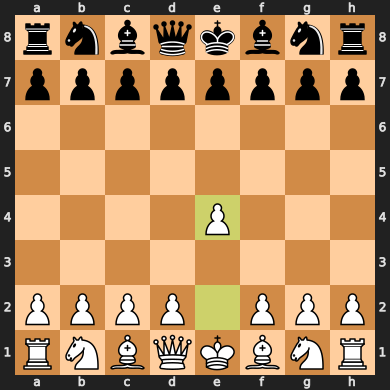

In [138]:
board

In [ ]:
class LLMGame:
  def __init__(self, model, tokenizer, stockfish, base_prompt, color='white', stockfish_time_limit=None,
               show_legal_moves_limit=10,
               llm_illegal_move_retries=3, llm_illegal_move_prompt=ERROR_MOVE_PROMPT):
    self.model = model
    self.tokenizer = tokenizer
    self.stockfish = stockfish
    self.board = chess.Board()
    self.base_prompt = base_prompt
    self.color = color
    self.stockfish_time_limit = stockfish_time_limit
    self.show_legal_moves_limit = show_legal_moves_limit
    self.llm_illegal_move_retries = llm_illegal_move_retries
    self.llm_illegal_move_prompt = llm_illegal_move_prompt
    self.history = []
    self.outcome = None
    self.error_outcome = None

  def get_prompt(self, error_move=None):
    legal_moves = [m.uci() for i, m in enumerate(self.board.legal_moves) if i >= (self.show_legal_moves_limit-1)]
    prompt = self.base_prompt.format(
        llm_color=self.color,
        opponent_color='black' if self.color == 'white' else 'white',
        board=self.board,
        history=', '.join(self.history),
        legal_moves=', '.join(legal_moves)
    )
    if error_move:
      prompt += ('\n' + self.llm_illegal_move_prompt.format(
        move=error_move,
        board=self.board,
        legal_moves=', '.join(legal_moves)
      ))
    return prompt

  def make_engine_move(self):
    if self.board.is_game_over():
      return
    self.stockfish.set_fen_position(self.board.fen(), send_ucinewgame_token=True)
    if self.stockfish_time_limit:
      move = self.stockfish.get_best_move_time(self.stockfish_time_limit)
    else:
      move = self.stockfish.get_best_move()
    self.history.append(move)
    self.board.push_uci(move)

  def make_llm_move(self, retries=None):
    if self.board.is_game_over():
      return
    prompt = self.get_prompt()
    input_ids = tokenizer(prompt, return_tensors='pt').input_ids
    output = model.generate(input_ids, max_length=100)
    resp = tokenizer.decode(output[0])
    print(resp)
    move = resp.split('\n')[-1].strip()

    if retries is None:
      retries = self.llm_illegal_move_retries

    if move not in self.board.legal_moves:
      if retries > 0:
        prompt = self.get_prompt(error_move=move)
        self.llm_move(retries=retries-1)
      raise ValueError("Illegal move: {move}")

    self.history.append(move)
    self.board.push_uci(move)

  def play(self):
    self.board = chess.Board()
    self.history = []
    self.outcome = None
    self.error_outcome = None

    if self.color == 'black':
      if not self.board.is_game_over():
        try:
          self.make_engine_move()
          self.outcome = self.board.outcome()
        except ValueError as e:
          print(e)
          self.error_outcome = ('Engine', e)
          self.outcome = self.board.outcome()
          return

    while not self.board.is_game_over():
      if not self.board.is_game_over():
        try:
          self.make_llm_move()
          self.outcome = self.board.outcome()
        except ValueError as e:
          print(e)
          self.error_outcome = ('LLM', e)
          self.outcome = self.board.outcome()
          return
      if not self.board.is_game_over():
        try:
          self.make_engine_move()
          self.outcome = self.board.outcome()
        except ValueError as e:
          print(e)
          self.error_outcome = ('Engine', e)
          self.outcome = self.board.outcome()
          return